<a href="https://colab.research.google.com/github/shirkeo/Stock-Market-Portfolio-Optimization-with-Python/blob/main/Stock_market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Portfolio Optimization with Python**

The given dataset consists of historical stock market data for multiple companies, including columns such as Date, Ticker, Adjusted Close, Close, High, Low, Open, and Volume. The data spans a significant period, providing daily price and volume information for each stock.


**Problem:**

The goal is to develop a portfolio optimization strategy using the given stock market data. This involves analyzing historical price trends, calculating key financial metrics, and applying **Modern Portfolio Theory (MPT)** to construct an efficient portfolio.

The primary objectives are:

1. Identify trends in stock prices using moving averages and other technical indicators.
2. Calculate the volatility and risk associated with each stock.
3. Determine the correlation between different stocks to understand their relationships and potential diversification benefits.
4. Generate and evaluate a series of random portfolios to identify the optimal portfolio that maximizes the Sharpe ratio, balancing risk and return effectively.

**Expected results include:**

1. Identification of the portfolio with the maximum Sharpe ratio, including the weights of each stock and the associated risk-return profile.
2. Recommendations for constructing a diversified investment portfolio that maximizes returns while minimizing risk, based on the historical performance and statistical analysis of the provided stock data.

Solution:

*Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics. If you want to learn how to optimize a stock market portfolio by analyzing the stock market performance*

# **Import Necessary Libraries**

In [2]:
import pandas as pd

In [3]:
import yfinance as yf

In [4]:
from datetime import date, timedelta

# **Import Data**

In [23]:
data = pd.read_csv('/content/drive/MyDrive/stock_data.csv')

# **Stock market data of some popular Indian companies:**

In [26]:
print(data.head())

         Date       Ticker    Adj Close        Close         High  \
0  2023-07-03  HDFCBANK.NS  1696.631836  1719.800049  1757.500000   
1  2023-07-03      INFY.NS  1309.278564  1333.699951  1346.000000   
2  2023-07-03  RELIANCE.NS  2405.791992  2414.290283  2420.105225   
3  2023-07-03       TCS.NS  3216.993164  3272.300049  3318.800049   
4  2023-07-04  HDFCBANK.NS  1704.918579  1728.199951  1747.000000   

           Low         Open      Volume  
0  1710.000000  1712.500000  22052058.0  
1  1328.449951  1330.000000   7732412.0  
2  2358.587158  2361.079346   6077193.0  
3  3268.750000  3314.300049   1687264.0  
4  1713.800049  1723.449951  19397594.0  


# Stock market performance of these companies in the stock market over time:

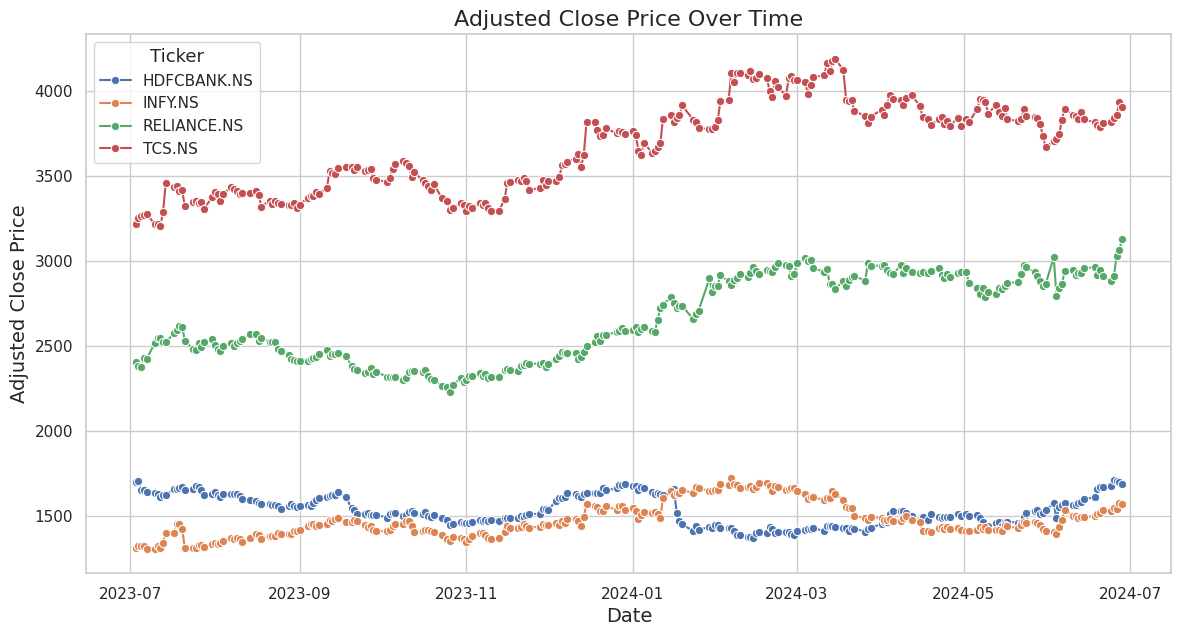

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

Interpretation of graph
1. The graph displays the
adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024.
2. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK.
3. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

# **Computing the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:**

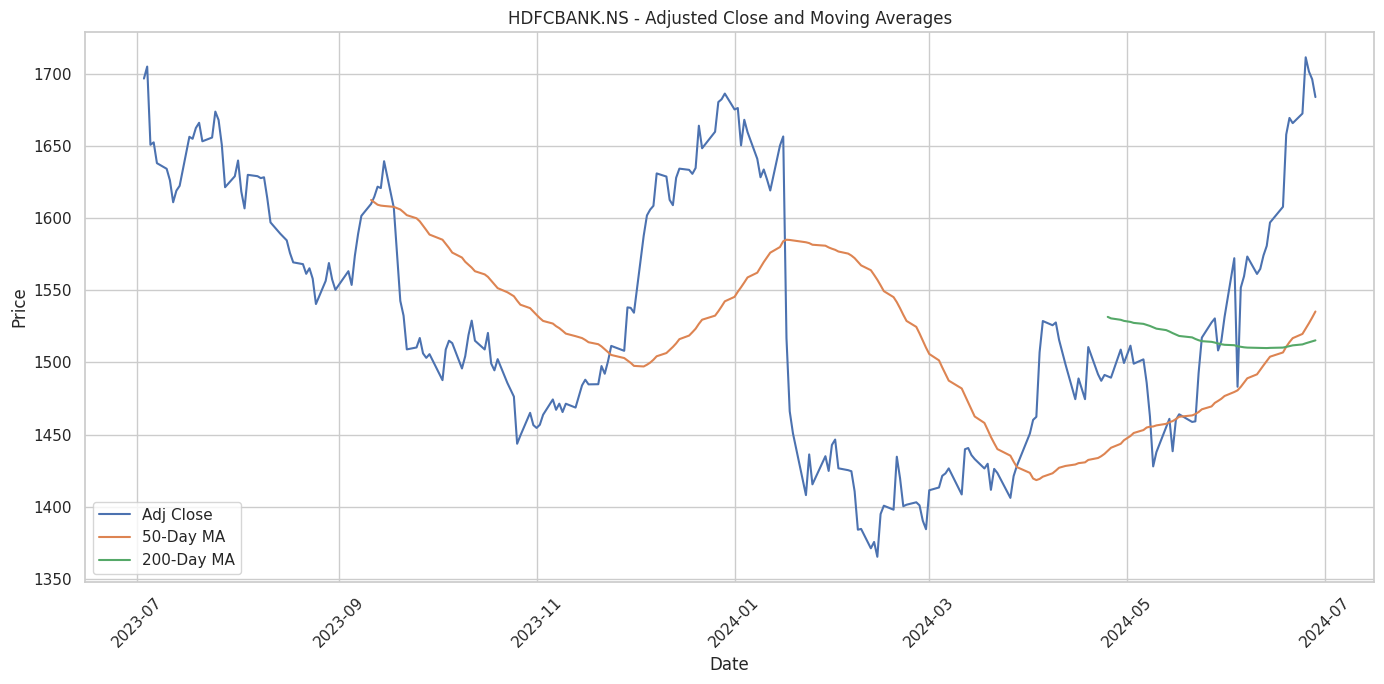

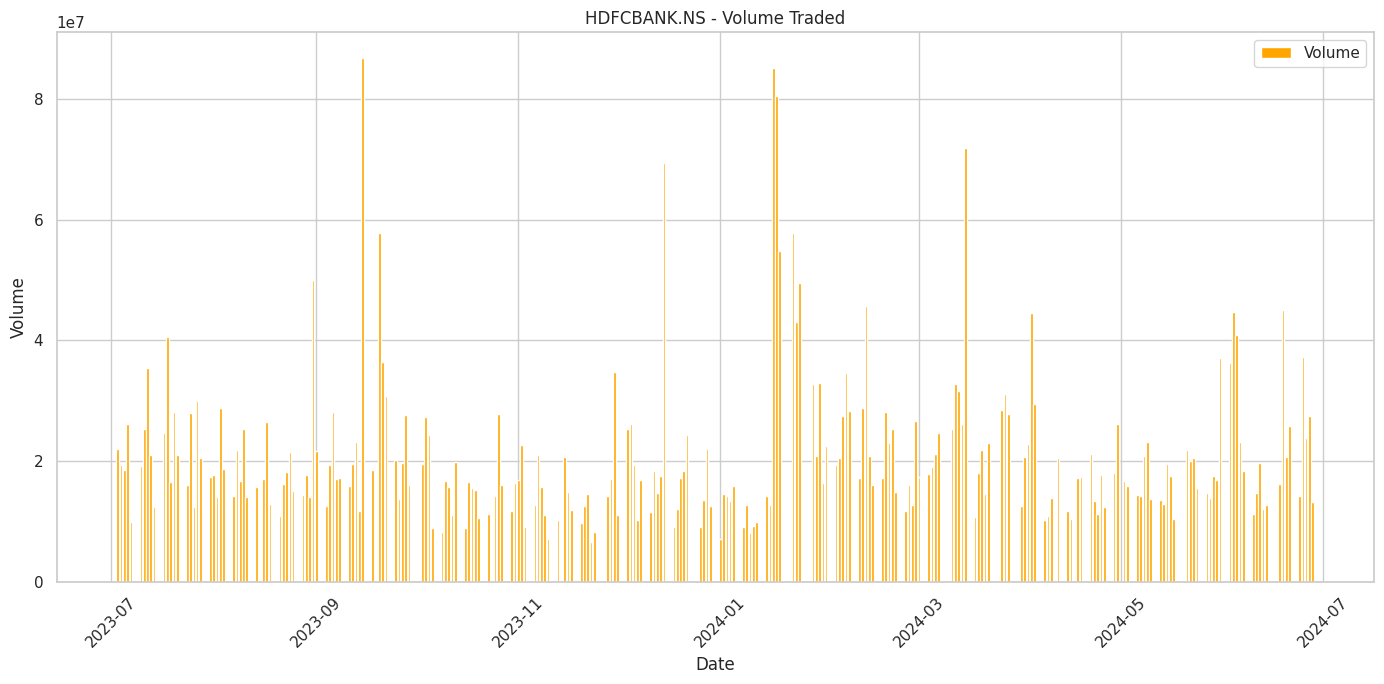

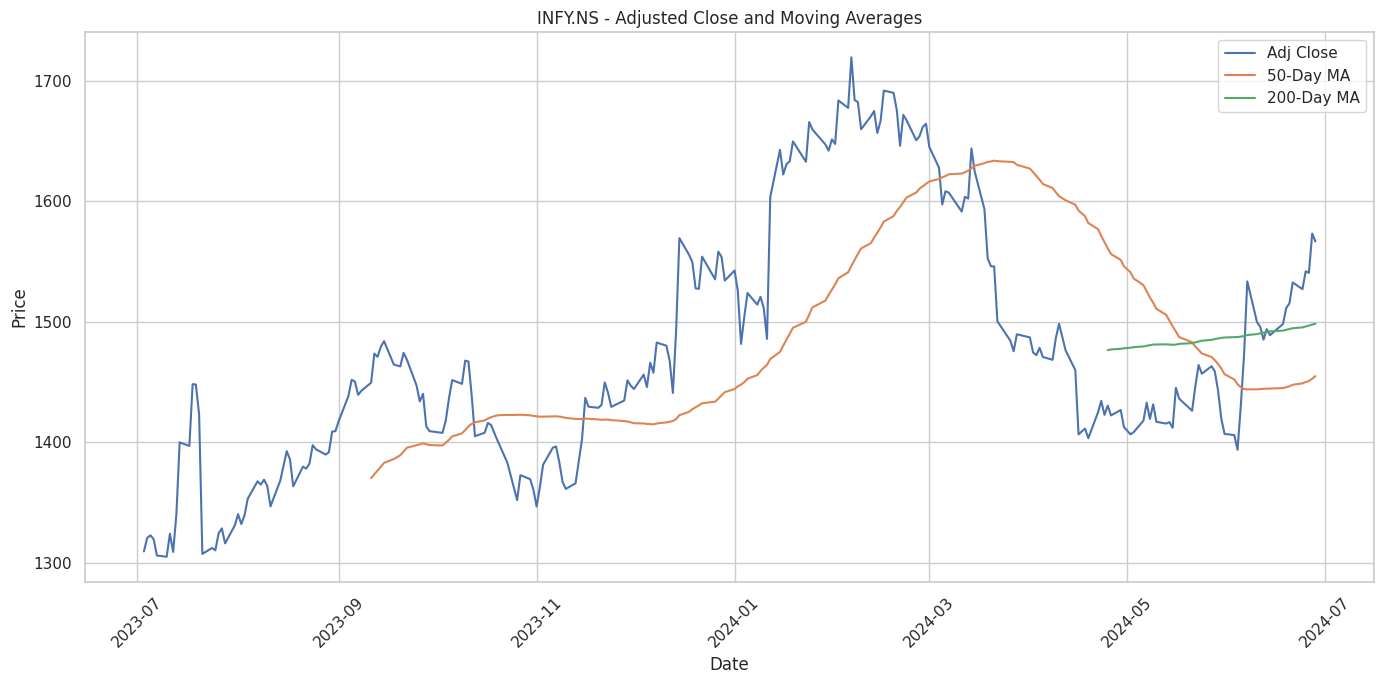

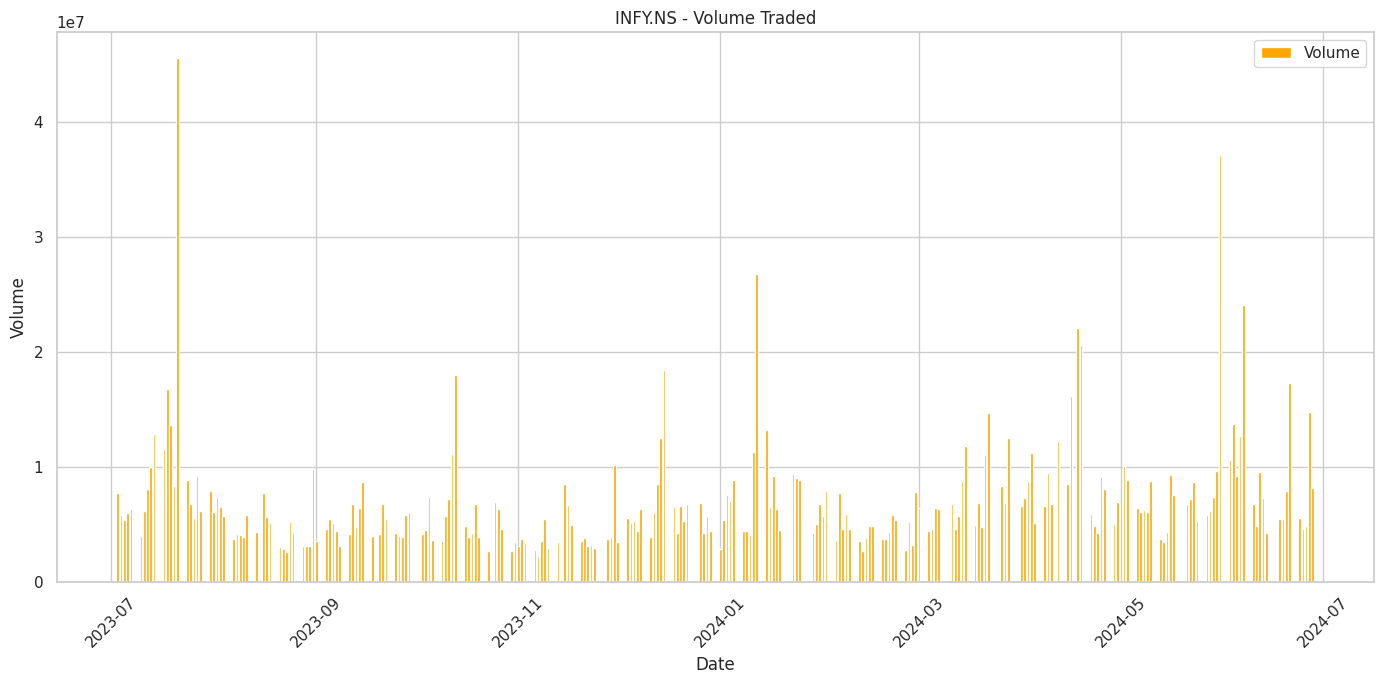

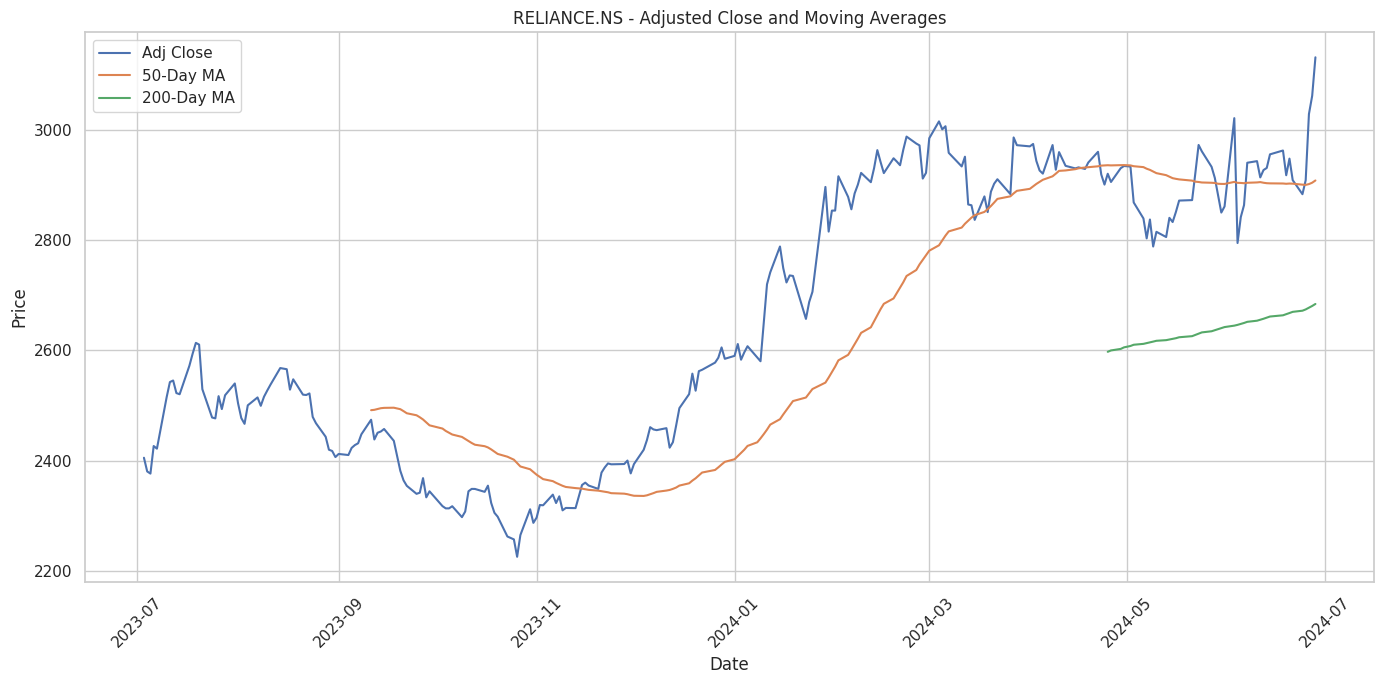

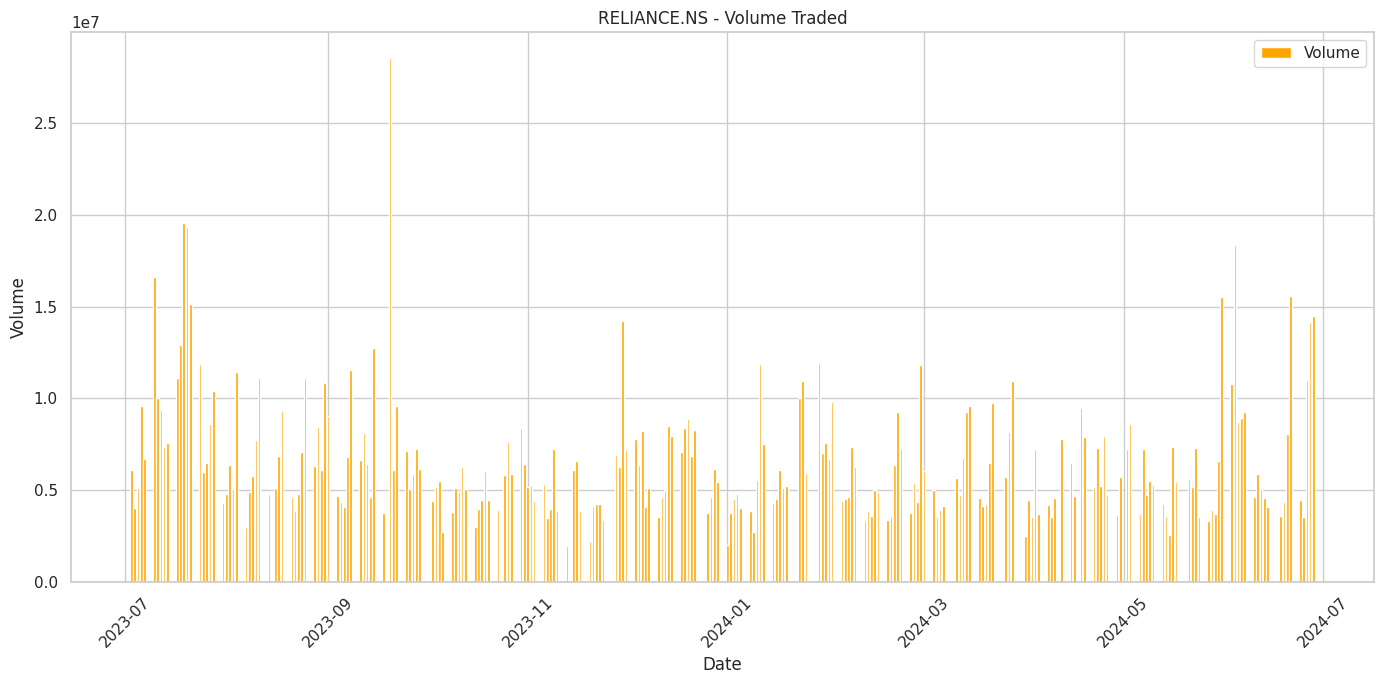

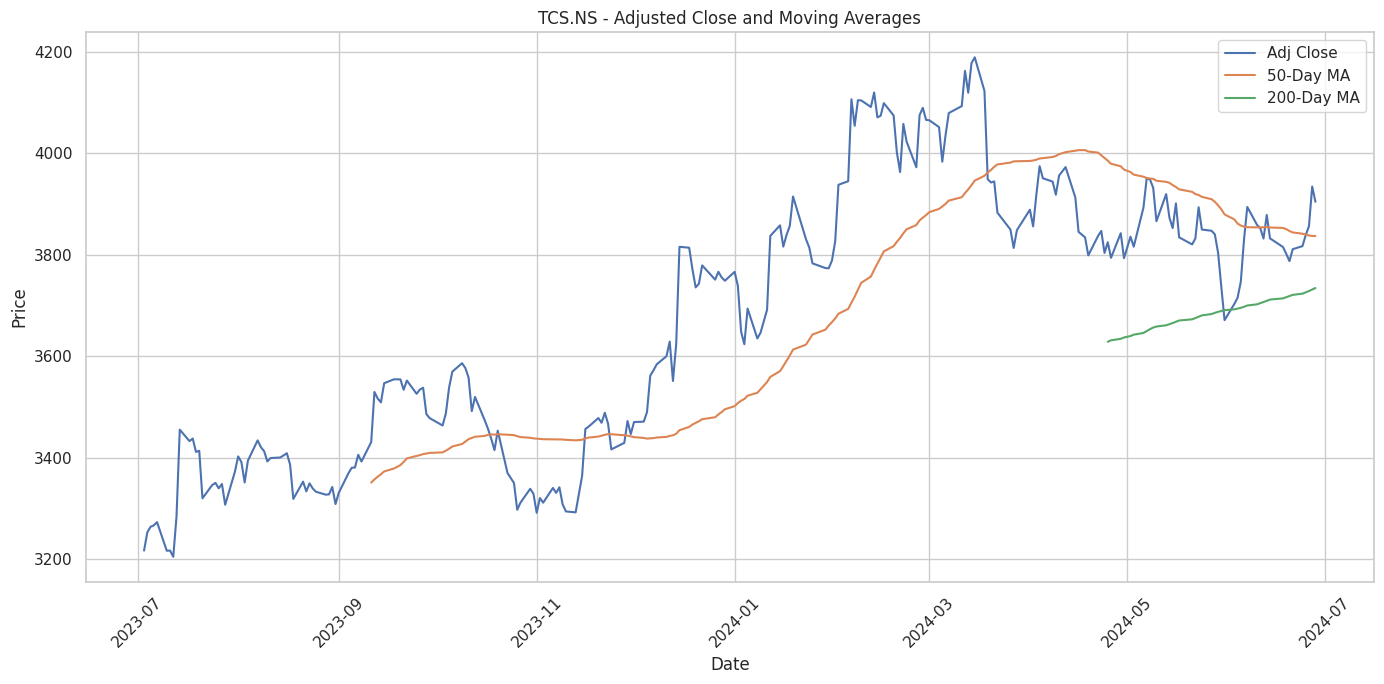

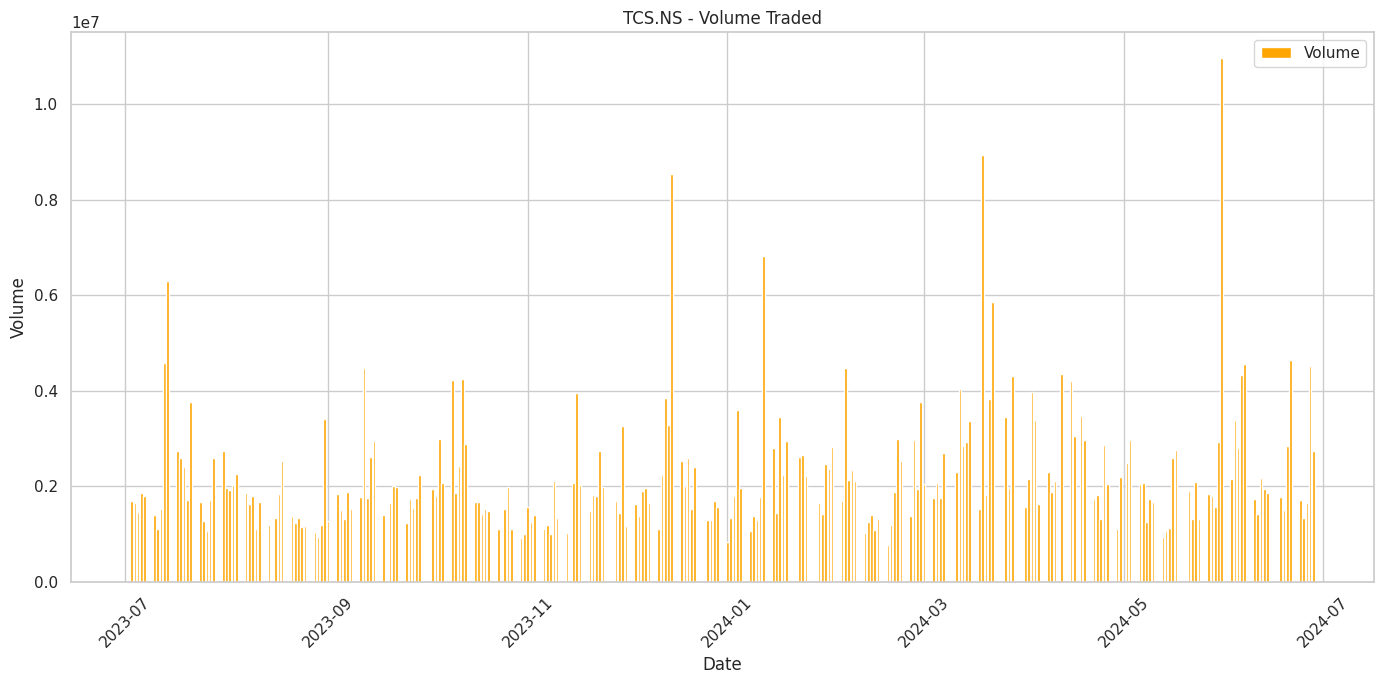

In [28]:
short_window = 50
long_window = 200

data.set_index('Date', inplace=True)
unique_tickers = data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = data[data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Interpretation of Graph

1. For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages.
2. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices.
3. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024.
4. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

# **Distribution of daily returns of these stocks:**

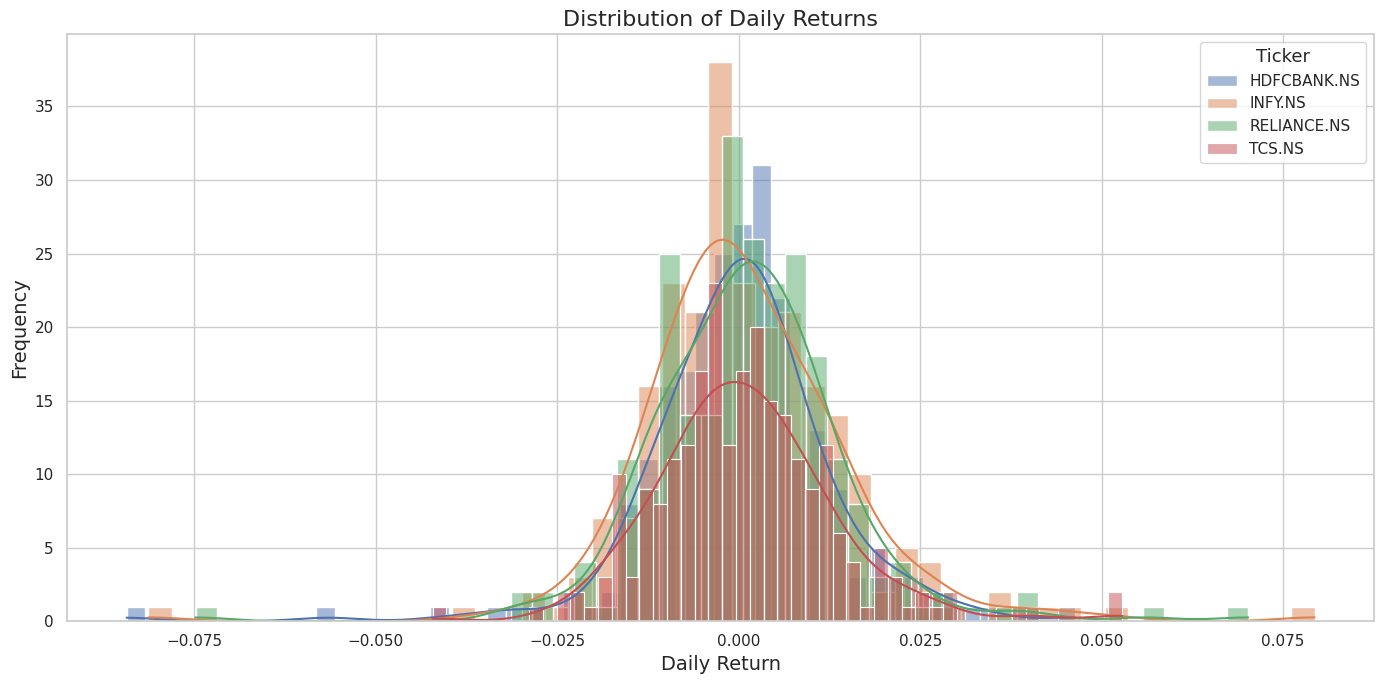

In [30]:
data['Daily Return'] = data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = data[data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation of graph

1. The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return.
2. However, there are tails on both sides, which reflect occasional significant gains or losses.
3. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

# **Correlation between all these stocks:**

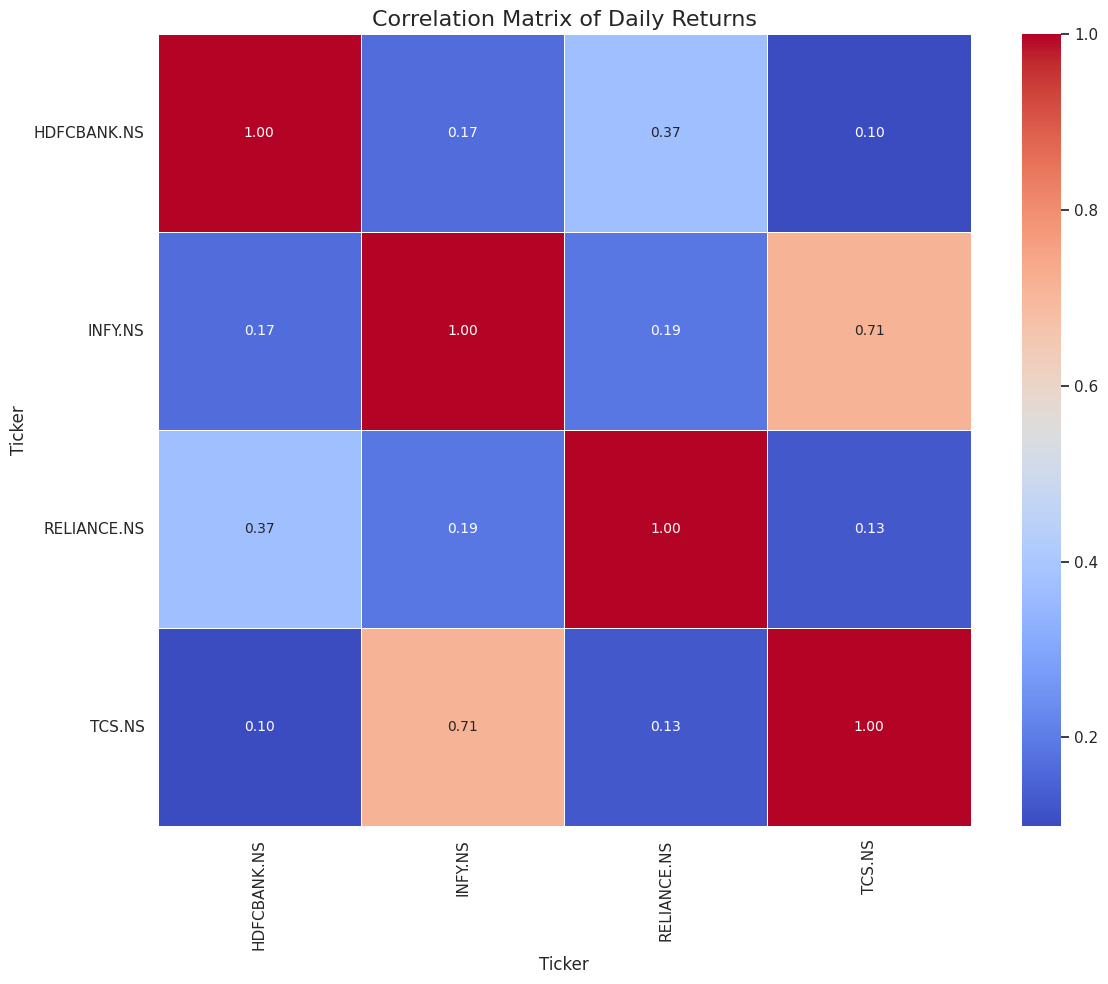

In [31]:
daily_returns = data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretation of graph

1. INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction.

2. HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13).

3. These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

# **Portfolio Optimization**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

1. Calculate the expected returns and volatility for each stock.

2. Generate a series of random portfolios to identify the efficient frontier.

3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

Let’s calculate the expected returns and volatility for each stock:

In [32]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.013661,0.206910
INFY.NS,0.213798,0.232261
RELIANCE.NS,0.297343,0.214664
TCS.NS,0.220852,0.196869


Interpretation of table

1. RELIANCE has the highest expected return (29.73%) and moderate volatility (21.47%), which indicates a potentially high-reward investment with relatively higher risk.

2. INFY and TCS also have high expected returns (21.38% and 22.09% respectively) with moderate volatility (23.23% and 19.69%).

3. HDFCBANK has the lowest expected return (1.37%) and moderate volatility (20.69%), which makes it the least attractive in terms of risk-adjusted returns.

# Now
1. Generate a large number of random portfolio weights.

2. Calculate the expected return and volatility for each portfolio.

3. Plot these portfolios to visualize the efficient frontier.

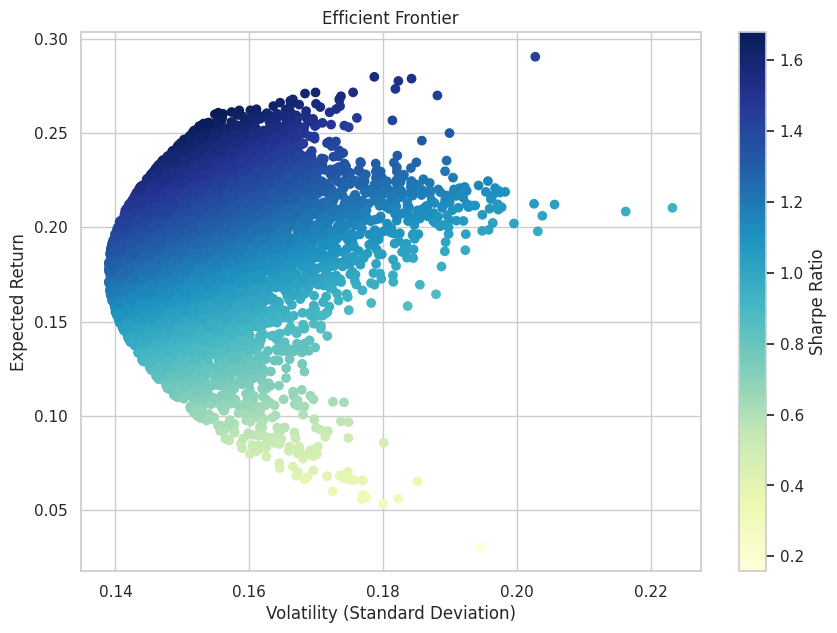

In [33]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

1. Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return.

2. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios.

3. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

# **Identifying the portfolio with the maximum Sharpe ratio**

In [34]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.26076539462645376, 0.15535419837197528, 1.6785217094814855)

The portfolio with the maximum Sharpe ratio has the following characteristics:

1. Expected Return: ~26.08%
2. Volatility: ~15.54%
3. Sharpe Ratio: ~1.68

# **Identifying the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:**

In [35]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.308527
1,INFY.NS,0.105945
2,RELIANCE.NS,0.180185
3,TCS.NS,0.405343


The output shows a diversified portfolio with the following allocations:

1. HDFCBANK (30.85%)
2. INFY (10.59%)
3. RELIANCE (18.02%)
4. TCS (40.53%).

TCS has the highest allocation,
which indicates its significant contribution to the portfolio’s performance, while INFY has the smallest allocation.

This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.